train epoch:  0  batch index:  0 loss:  2.302212953567505
train epoch:  0  batch index:  10 loss:  2.2024004459381104
train epoch:  0  batch index:  20 loss:  1.9442964792251587
train epoch:  0  batch index:  30 loss:  1.3419679403305054
train epoch:  0  batch index:  40 loss:  0.8416656851768494
train epoch:  0  batch index:  50 loss:  0.6992102861404419
train epoch:  0  batch index:  60 loss:  0.5804939270019531
train epoch:  0  batch index:  70 loss:  0.5551868081092834
train epoch:  0  batch index:  80 loss:  0.4297395646572113
train epoch:  0  batch index:  90 loss:  0.4656063914299011
train epoch:  0  batch index:  100 loss:  0.40730544924736023
train epoch:  0  batch index:  110 loss:  0.37702491879463196
epoch:  0 accuracy:  0.8887
train epoch:  1  batch index:  0 loss:  0.3875262141227722
train epoch:  1  batch index:  10 loss:  0.3604903221130371
train epoch:  1  batch index:  20 loss:  0.3572559654712677
train epoch:  1  batch index:  30 loss:  0.299441397190094
train epoch:

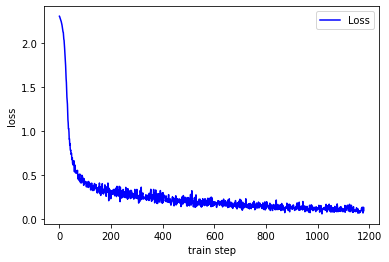

In [10]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer3(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_col.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect = []
accuracy_col = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect)

train epoch:  0  batch index:  0 loss:  2.302797317504883
train epoch:  0  batch index:  10 loss:  2.3008482456207275
train epoch:  0  batch index:  20 loss:  2.297185182571411
train epoch:  0  batch index:  30 loss:  2.2891998291015625
train epoch:  0  batch index:  40 loss:  2.282975673675537
train epoch:  0  batch index:  50 loss:  2.276855230331421
train epoch:  0  batch index:  60 loss:  2.2509286403656006
train epoch:  0  batch index:  70 loss:  2.21142578125
train epoch:  0  batch index:  80 loss:  2.111978769302368
train epoch:  0  batch index:  90 loss:  1.876563549041748
train epoch:  0  batch index:  100 loss:  1.4938414096832275
train epoch:  0  batch index:  110 loss:  1.1726592779159546
epoch:  0 accuracy:  0.6202
train epoch:  1  batch index:  0 loss:  1.1307228803634644
train epoch:  1  batch index:  10 loss:  0.9216914176940918
train epoch:  1  batch index:  20 loss:  0.9041368365287781
train epoch:  1  batch index:  30 loss:  0.8567839860916138
train epoch:  1  batch 

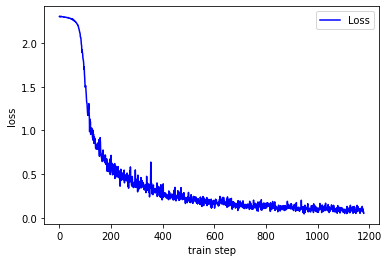

In [4]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = True


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 256)
        self.layer4 = nn.Linear(256, 128)
        self.layer5 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer5(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_drop.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_col_drop.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_drop = []
accuracy_col_drop = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_drop)

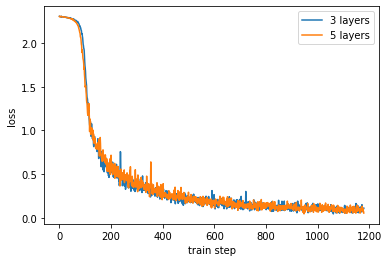

In [7]:
plt.plot(range(len(loss_collect)), loss_collect, label="3 layers")
plt.legend()
plt.plot(range(len(loss_collect_drop)), loss_collect_drop, label="5 layers")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

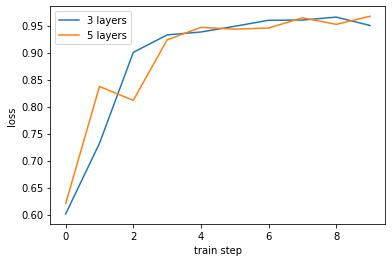

In [8]:
plt.plot(range(len(accuracy_col)), accuracy_col, label="3 layers")
plt.legend()
plt.plot(range(len(accuracy_col_drop)), accuracy_col_drop, label="5 layers")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

train epoch:  0  batch index:  0 loss:  2.2968461513519287
train epoch:  0  batch index:  10 loss:  2.206230401992798
train epoch:  0  batch index:  20 loss:  1.9519606828689575
train epoch:  0  batch index:  30 loss:  1.3683514595031738
train epoch:  0  batch index:  40 loss:  0.9142829179763794
train epoch:  0  batch index:  50 loss:  0.6903890371322632
train epoch:  0  batch index:  60 loss:  0.4990557134151459
train epoch:  0  batch index:  70 loss:  0.47615349292755127
train epoch:  0  batch index:  80 loss:  0.47389915585517883
train epoch:  0  batch index:  90 loss:  0.46433308720588684
train epoch:  0  batch index:  100 loss:  0.3788791000843048
train epoch:  0  batch index:  110 loss:  0.3245847821235657
epoch:  0 accuracy:  0.8925
train epoch:  1  batch index:  0 loss:  0.3806338608264923
train epoch:  1  batch index:  10 loss:  0.3625830113887787
train epoch:  1  batch index:  20 loss:  0.34358423948287964
train epoch:  1  batch index:  30 loss:  0.3779757618904114
train epo

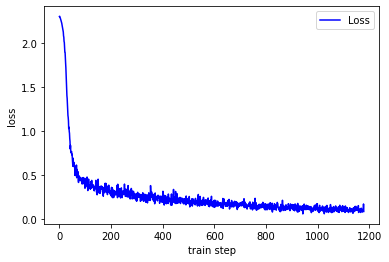

In [12]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer3(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_drop.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_col_drop.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_drop = []
accuracy_col_drop = []
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_drop)

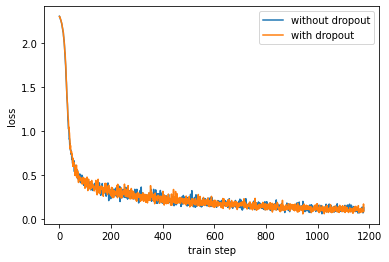

In [14]:
plt.plot(range(len(loss_collect)), loss_collect, label="without dropout")
plt.legend()
plt.plot(range(len(loss_collect_drop)), loss_collect_drop, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

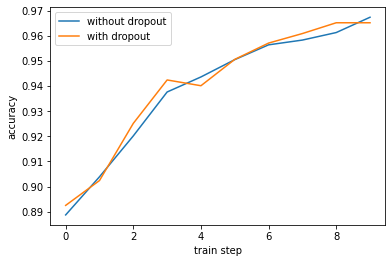

In [15]:
plt.plot(range(len(accuracy_col)), accuracy_col, label="without dropout")
plt.legend()
plt.plot(range(len(accuracy_col_drop)), accuracy_col_drop, label="with dropout")
plt.legend()
plt.xlabel("train step")
plt.ylabel("accuracy")
plt.show()